Bağlantı oluşturma

In [6]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}



E: Package 'python-software-properties' has no installation candidate
Selecting previously unselected package google-drive-ocamlfuse.
(Reading database ... 160772 files and directories currently installed.)
Preparing to unpack .../google-drive-ocamlfuse_0.7.26-0ubuntu1~ubuntu18.04.1_amd64.deb ...
Unpacking google-drive-ocamlfuse (0.7.26-0ubuntu1~ubuntu18.04.1) ...
Setting up google-drive-ocamlfuse (0.7.26-0ubuntu1~ubuntu18.04.1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope

In [7]:
!mkdir -p drive
!google-drive-ocamlfuse drive

 drive bağlantı ve veri setini ekleme


In [8]:
import sys
sys.path.insert(0, 'drive/Colab Notebooks/MakinaFinal')

In [29]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [10]:
df=pd.read_csv('drive/Colab Notebooks/MakinaFinal/bugday.csv')

Veri setine baktık

In [11]:
df.head()

,date,open,high,low,close
0,2018-03-12,488.50,492.75,483.00,490.00
1,2018-03-09,499.25,499.25,486.00,490.25
2,2018-03-08,497.50,502.50,490.25,499.25
3,2018-03-07,506.00,509.75,496.00,497.50
4,2018-03-06,507.00,507.50,495.50,506.00


2272 satı ve 5 sütunluk bir veri setine sahibiz

In [13]:
df.shape

(2272, 5)

In [20]:

x = df["date"]
y = df["close"]

tarih ve kapanış fiyat verisini alıyoruz

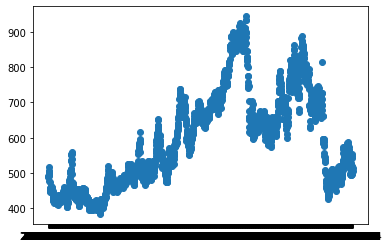

In [23]:

plt.scatter(x,y)
plt.show()



farklı bir görselleştirme daha

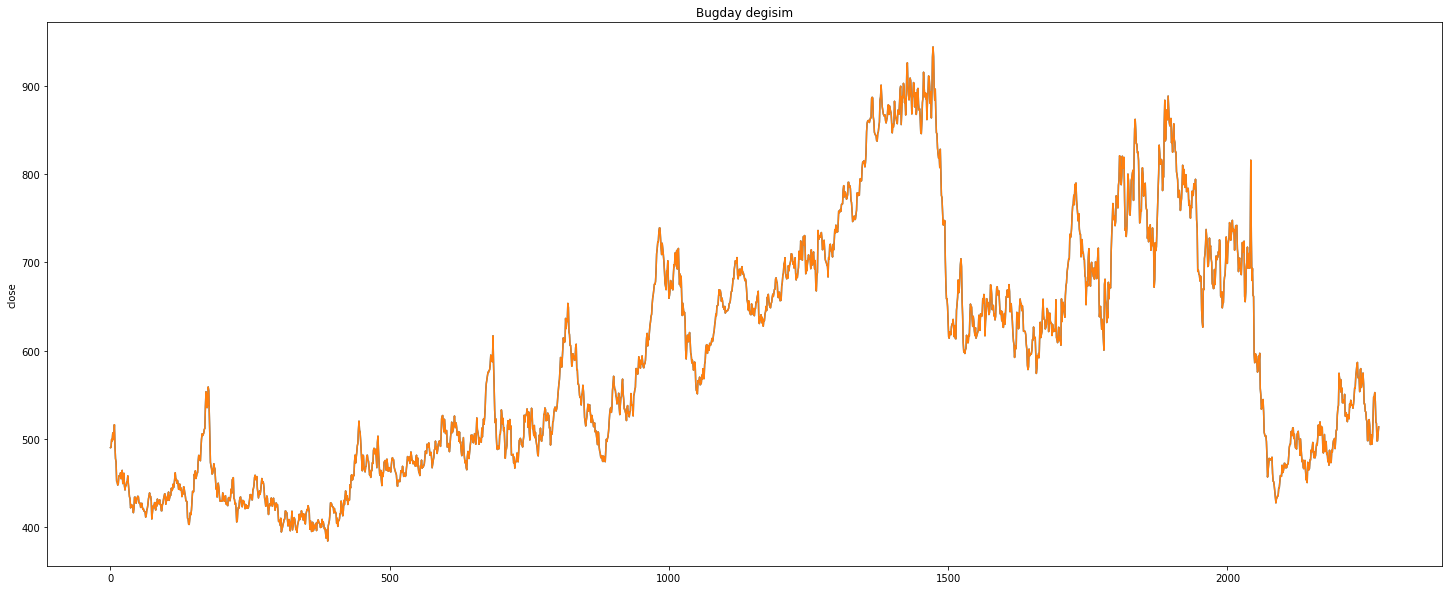

In [91]:
plt.title("Bugday degisim")

plt.ylabel("close")
plt.plot(df["close"])

df["close"].plot(figsize=(25,10))
plt.show()

Görselleştirme yaparak varimize baktık

In [45]:
df=df[['close']]
df.tail()

,close
2267,517.50
2268,497.50
2269,497.75
2270,505.38
2271,513.50


yeni bir sütun ve tahmin verisi ataması yapıyoruz

In [88]:
gelecek_gunler=10
df['tahmin']=df[['close']].shift(-gelecek_gunler)
df.tail()

,close,tahmin
2267,517.50,NaN
2268,497.50,NaN
2269,497.75,NaN
2270,505.38,NaN
2271,513.50,NaN


In [80]:
x=np.array(df.drop(['tahmin'],1))[:-gelecek_gunler]
print(x)

[[490.  ]
 [490.25]
 [499.25]
 ...
 [521.63]
 [519.75]
 [497.88]]


In [81]:
y=np.array(df['tahmin'])[:-gelecek_gunler]
print(x)

[[490.  ]
 [490.25]
 [499.25]
 ...
 [521.63]
 [519.75]
 [497.88]]


datayı ayırma ve test için hazırlama

In [82]:
x_train,x_test, y_train,y_test=train_test_split(x,y,test_size=25)

In [83]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

tree=DecisionTreeRegressor().fit(x_train,y_train)
lr=LinearRegression().fit(x_train,y_train)

Geleceteki günler için olan kod kısmı

In [84]:
x_gelecek=df.drop(['tahmin'],1)[-gelecek_gunler:]
x_gelecek=x_gelecek.tail(gelecek_gunler)
x_gelecek=np.array(x_gelecek)
x_gelecek

array([[497.88],
       [512.25],
       [521.75],
       [514.63],
       [493.63],
       [493.63],
       [504.38],
       [493.88],
       [502.88],
       [527.13],
       [547.38],
       [547.  ],
       [552.38],
       [542.38],
       [518.88],
       [517.5 ],
       [497.5 ],
       [497.75],
       [505.38],
       [513.5 ]])

lineer ve tree için tahminde bulunduk 10 gün için

In [85]:
tree_tahminleri=tree.predict(x_gelecek)
print(tree_tahminleri)

lr_tahminleri=lr.predict(x_gelecek)
print(lr_tahminleri)

[531.94   485.63   497.75   494.63   489.5    489.5    460.13   497.1925
 470.13   549.92   526.5    526.5    513.63   524.88   524.9725 472.63
 485.815  463.75   614.38   476.63  ]
[505.00354439 518.36520142 527.19858637 520.5781968  501.05176691
 501.05176691 511.04743936 501.28422441 509.65269436 532.20107174
 551.03012914 550.67679374 555.67927911 546.38097916 524.52997428
 523.24680889 504.65020899 504.88266649 511.97726935 519.52748891]


Grafikte gösteriyoruz

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


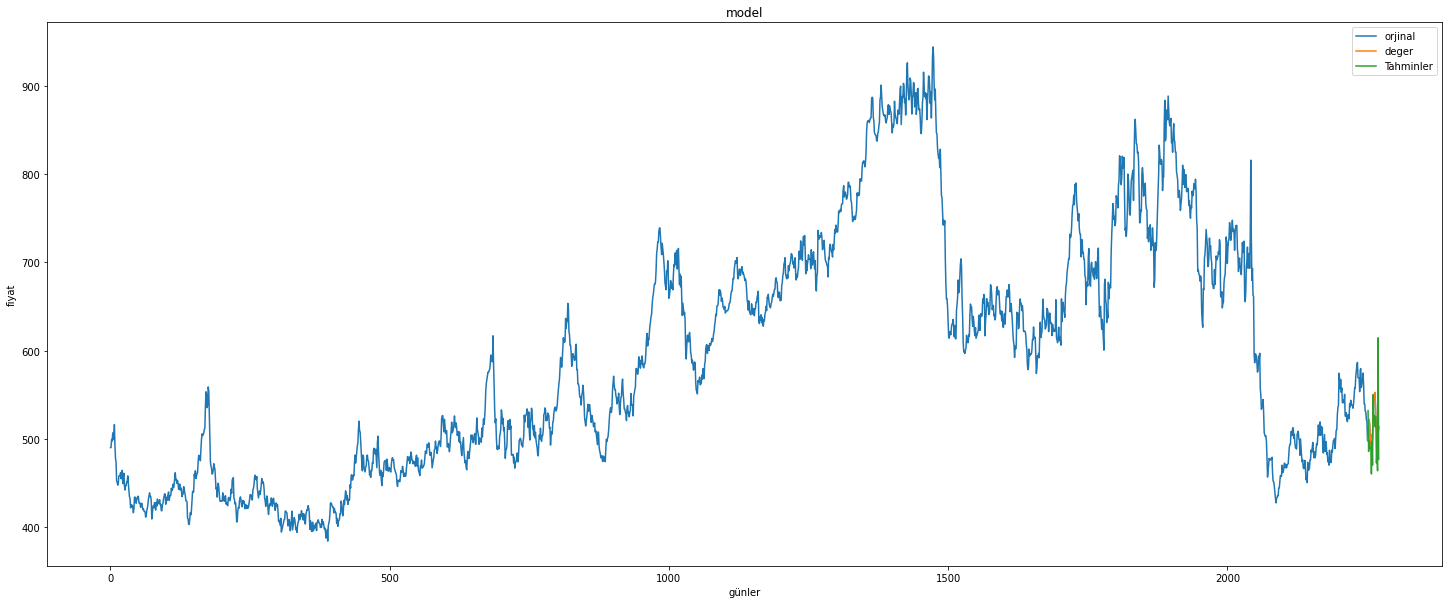

In [89]:
tahminler=tree_tahminleri
valid=df[x.shape[0]:]
valid['Tahminler']=tahminler
plt.figure(figsize=(25,10))
plt.title('model')
plt.xlabel('günler')
plt.ylabel('fiyat')
plt.plot(df['close'])
plt.plot(valid[['close','Tahminler']])
plt.legend(['orjinal','deger','Tahminler'])
plt.show()

tre ile gösterimden sonra birde linear ile bakıyoruz

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


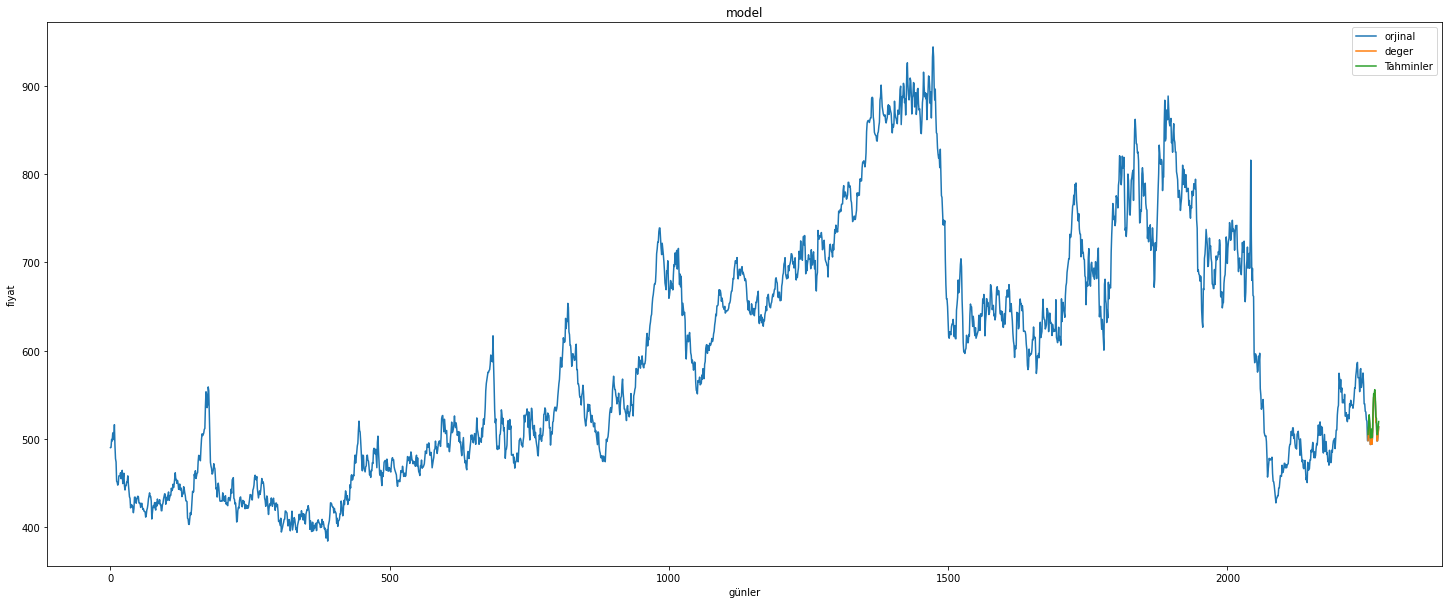

In [90]:
tahminler=lr_tahminleri
valid=df[x.shape[0]:]
valid['Tahminler']=tahminler
plt.figure(figsize=(25,10))
plt.title('model')
plt.xlabel('günler')
plt.ylabel('fiyat')
plt.plot(df['close'])
plt.plot(valid[['close','Tahminler']])
plt.legend(['orjinal','deger','Tahminler'])
plt.show()